# Simulación de curvas periódicas

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
project_path = os.path.abspath('..')
sys.path.insert(1, project_path)

import numpy as np
import pandas as pd
from scipy import signal

import torch

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context(context="notebook")
sns.set_style("whitegrid")

from torch.utils.data import Dataset
from src.data.light_curve import *
from src.utils import get_project_root

import joblib

In [2]:
arg_dict = {'size': 96, 'embedding': 64, 'num_layers': 2, 'model_type': 'gru',
       'sim_type': 'asas_linear_fold/n200_ss0.7', 'n_min': 200, 'n_max': 200,
       'lr': 5e-4, 'bidirectional': True, 'drop_frac': 0.25, 'period_fold': True,
       'survey_files': ['data/linear/full.pkl'], 'no_train': True}

In [2]:
full = joblib.load(get_project_root() / 'data' / 'macho' / 'full.pkl')
for lc in full:
    lc.period_fold()
# split = [el for lc in full for el in lc.split(10, 200)]

In [52]:
data = pd.DataFrame({'mjd':np.array([lc.times for lc in full], dtype=object), 'mag':[lc.measurements for lc in full], 'errors':[lc.errors for lc in full],
                    'label':[lc.label for lc in full], 'ss_resid':[lc.ss_resid for lc in full] },
                    index=[lc.name for lc in full])
data.index.name = 'source_id'

In [55]:
data.shape

(21470, 5)

In [54]:
data['mjd'].values.tolist()

[array([3.2220000e-02, 9.3180000e-02, 7.4404000e-01, 9.1624000e-01,
        9.6066000e-01, 1.0607800e+00, 1.1345200e+00, 1.2986000e+00,
        1.5092200e+00, 2.0894200e+00, 2.3286800e+00, 2.4066600e+00,
        2.4263600e+00, 2.4444400e+00, 2.9920600e+00, 3.0119000e+00,
        3.0401800e+00, 3.1249000e+00, 3.5682200e+00, 3.5726200e+00,
        3.6242800e+00, 3.7606800e+00, 3.7875600e+00, 4.0378800e+00,
        4.2889800e+00, 4.5082400e+00, 4.5314000e+00, 4.9368400e+00,
        5.0174600e+00, 5.3180400e+00, 5.5292400e+00, 6.0765800e+00,
        6.1181200e+00, 6.9659800e+00, 7.1129800e+00, 7.1331000e+00,
        7.1637200e+00, 7.2976600e+00, 7.4397200e+00, 7.6627800e+00,
        7.7980400e+00, 7.9113400e+00, 8.0490800e+00, 8.1771000e+00,
        8.2664800e+00, 8.3262600e+00, 8.4866400e+00, 8.6885800e+00,
        8.7580800e+00, 8.8056400e+00, 8.9685200e+00, 9.0183400e+00,
        9.1041000e+00, 9.1433000e+00, 9.2931800e+00, 9.3172400e+00,
        9.5459600e+00, 9.6731800e+00, 9.9866000e

In [41]:
asd = data['label'].values
asd = asd[(asd != 'RRL E') & (asd != 'RRL + GB')]
asd[(asd == 'RRL AB') | (asd == 'RRL C')] = 'RRL'
asd[(asd == 'LPV WoodA') | (asd == 'LPV WoodB') | (asd == 'LPV WoodC') | (asd == 'LPV WoodD')] = 'LPV'
asd[(asd == 'Ceph Fund') | (asd == 'Ceph 1st')] = 'Ceph'

In [46]:
mask = (asd != 'RRL E') & (asd != 'RRL + GB')

In [57]:
from sklearn.model_selection import train_test_split

In [60]:
df_train, df_test = train_test_split(data, test_size=0.3)

0.8431511974645182


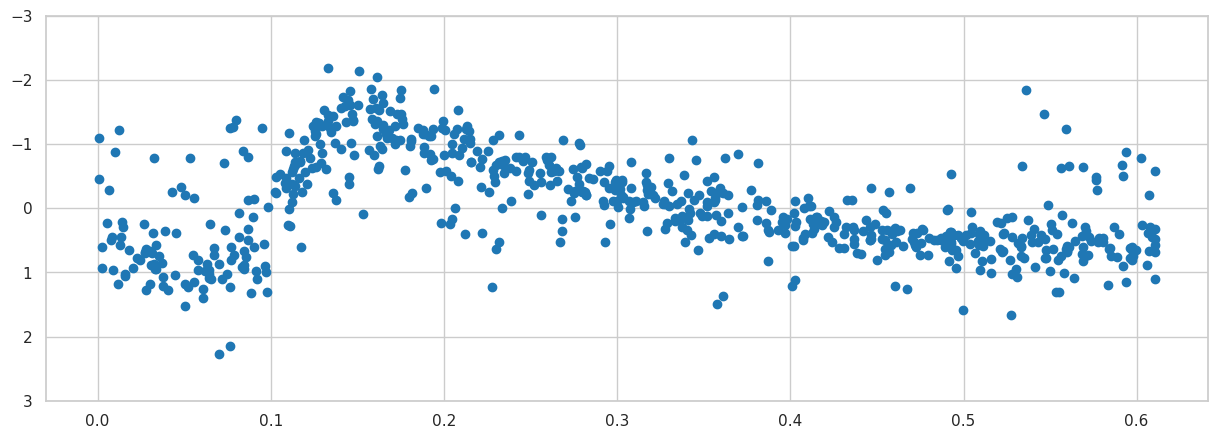

In [12]:
idx = 367
temp = data.loc[data.label == 'RRL AB'].iloc[idx]
print(temp.ss_resid)

fig, ax = plt.subplots(figsize=(15,5))

mag = (temp.mag - temp.mag.mean()) / temp.mag.std()

err_thresh = 0.4
ax.scatter(temp.mjd[(temp.errors < err_thresh)], mag[(temp.errors < err_thresh)])
ax.set_ylim(-3,3)
ax.invert_yaxis()

In [79]:
full[100].label

'RRL AB'

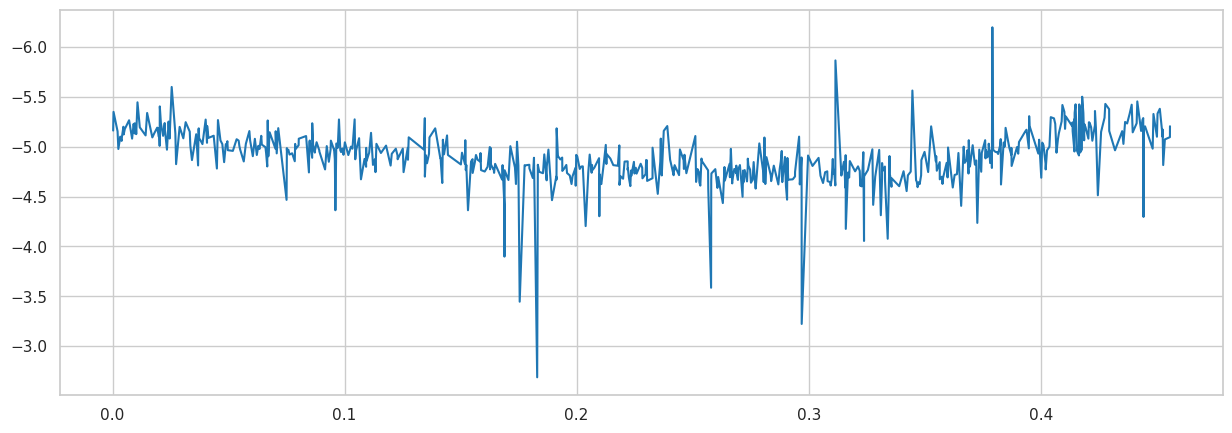

In [97]:
idx = 100
full[idx].period_fold()

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(full[idx].times, full[idx].measurements)
ax.invert_yaxis()

In [33]:
help(split[0])

Help on LightCurve in module src.data.light_curve object:

class LightCurve(builtins.object)
 |  LightCurve(times, measurements, errors, survey=None, name=None, best_period=None, best_score=None, label=None, p=None, p_signif=None, p_class=None, ss_resid=None)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, times, measurements, errors, survey=None, name=None, best_period=None, best_score=None, label=None, p=None, p_signif=None, p_class=None, ss_resid=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __len__(self)
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  fit_lomb_scargle(self)
 |  
 |  fit_supersmoother(self, periodic=True, scale=True)
 |  
 |  load_asas()
 |  
 |  load_linear()
 |  
 |  load_macho()
 |  
 |  period_fold(self, p=None)
 |  
 |  split(self, n_min=0, n_max=inf)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary fo

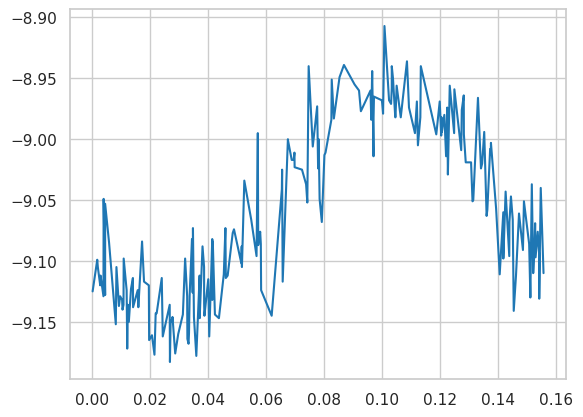

In [28]:
split[20].period_fold()
plt.plot(split[20].times, split[20].measurements)

In [8]:
len(asd)


NameError: name 'asd' is not defined

In [2]:
asd = LightCurve()

TypeError: __init__() missing 3 required positional arguments: 'times', 'measurements', and 'errors'

## Generación de curvas períodicas

### Visualización de curvas

In [2]:
def plot_periodic(mjd, mag, P, title, ax):
    ax[0].plot(mjd, mag, '.')
    ax[0].set_xlabel('Época')
    ax[0].set_ylabel('Magnitud')
    ax[0].set_title(f'{title} - Sin doblar')
     
    ax[1].plot(np.mod(mjd, P)/P, mag, '.')
    ax[1].set_xlabel('Fase')
    ax[1].set_ylabel('Magnitud')
    ax[1].set_title(f'{title} - Doblada')

### Random MJD's

In [3]:
def random_dates(start='1970-01-01', end='2022-09-01', N=100, irregular=True):
    "Create N mjd within range."
    start_seconds = pd.to_datetime(start).value//10**9
    end_seconds = pd.to_datetime(end).value//10**9

    if irregular:
        rand_dates = pd.to_datetime(np.random.randint(start_seconds, end_seconds, N), unit='s')
    else:
        rand_dates =  pd.to_datetime(np.linspace(start_seconds, end_seconds, N), unit='s')
    rand_mjd = rand_dates.to_julian_date() - 2400000.5
    return rand_mjd.values.round(3) 

### Señal cuadrada

In [6]:
def random_periodic_square_signal(period, seq_len=100, s_noise=0.2, irregular=True):
    """Genera una curva aleatoria de señales cuadradas.

    Parameters
    ----------
    seq_len : int
        Número int que define la cantidad de períodos a generar.
    s_noise : float
        float que fija la cantidad de ruido a agregar.

    Returns
    -------
    tuple
        tuple con los tiempos y magnitudes de la curva.            
    """    
    mjd = random_dates(N=seq_len, irregular=irregular)
    # mjd = np.sort(mjd)
    # mjd = (mjd - mjd.mean()) / mjd.std()
    mag = signal.square(2 * np.pi * mjd/period) 
    mag += np.random.randn(seq_len)*s_noise
    return mjd, mag

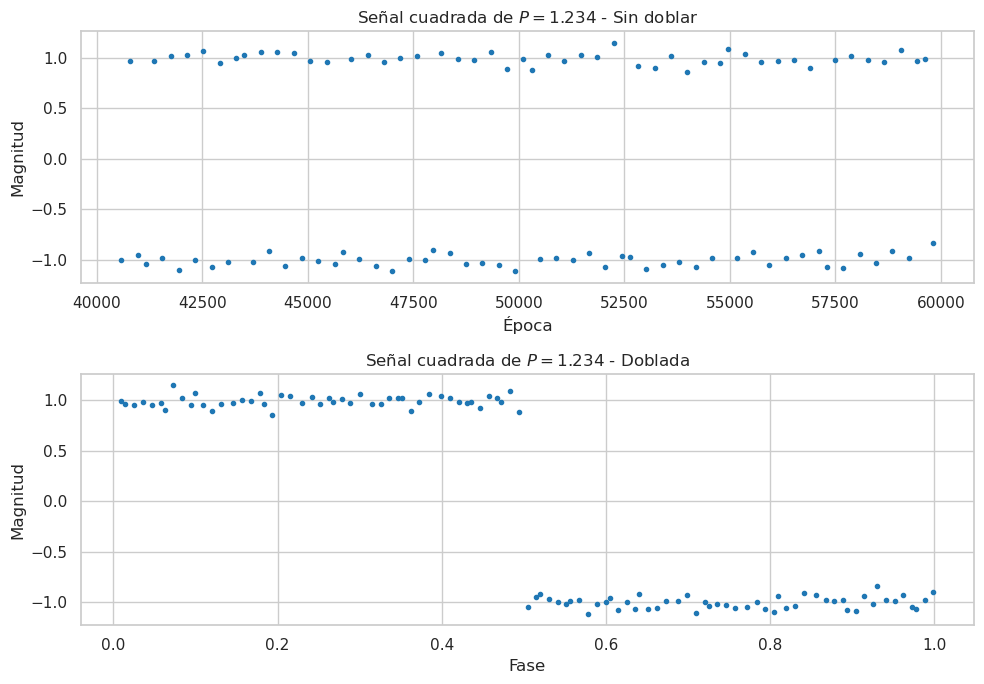

In [7]:
P = 1.234
mjd, mag = random_periodic_square_signal(P, s_noise=0.05, irregular=False)

fig, ax = plt.subplots(2, figsize=(10,7), tight_layout=True)
plot_periodic(mjd, mag, P, 'Señal cuadrada de $P=1.234$', ax)

## Señal diente de sierra

In [27]:
def random_periodic_sawtooth_signal(period, seq_len=100, s_noise=0.2, irregular=True):
    """Genera una curva aleatoria de diente de sierra.

    Parameters
    ----------
    seq_len : int
        Número int que define la cantidad de períodos a generar.
    s_noise : float
        float que fija la cantidad de ruido a agregar.

    Returns
    -------
    tuple
        tuple con los tiempos y magnitudes de la curva.            
    """    
    mjd = random_dates(N=seq_len, irregular=irregular)
    mjd = np.sort(mjd)
    mag = signal.sawtooth(2 * np.pi * mjd/period) 
    mag += np.random.randn(seq_len)*s_noise
    return mjd, mag

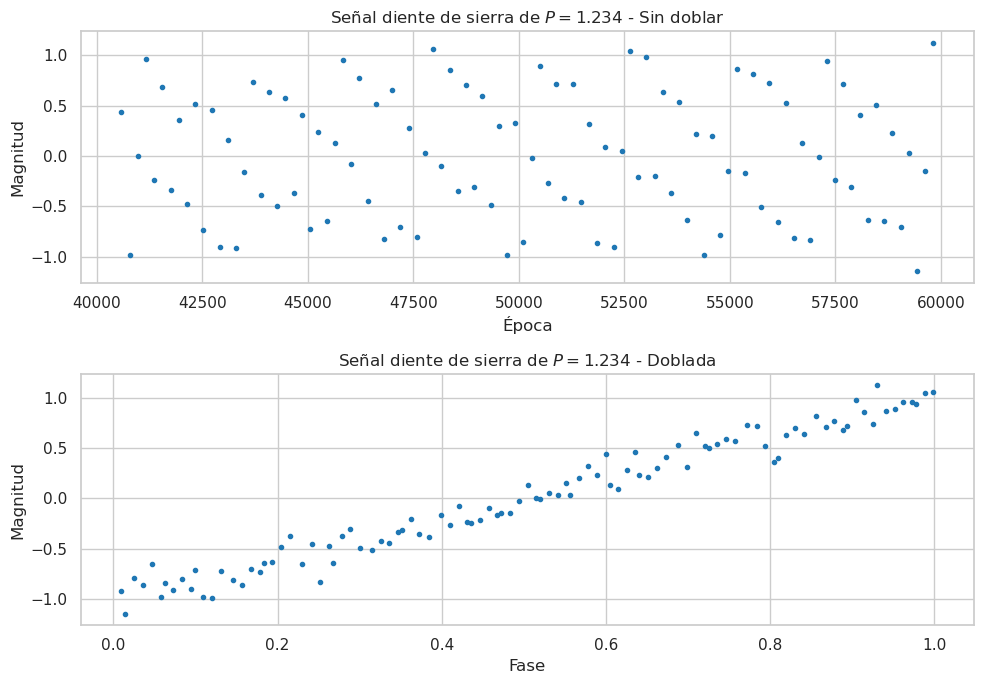

In [28]:
P = 1.234
mjd, mag = random_periodic_sawtooth_signal(P, s_noise=0.1, irregular=False)

fig, ax = plt.subplots(2, figsize=(10,7), tight_layout=True)
plot_periodic(mjd, mag, P, 'Señal diente de sierra de $P=1.234$', ax)

## Suma de sinusoides

In [35]:
def random_periodic_sin_mix(period, seq_len=100, s_noise=0.2, irregular=True):
    """Genera una curva aleatoria de suma de sinusoides.

    Parameters
    ----------
    seq_len : int
        Número int que define la cantidad de períodos a generar.
    s_noise : float
        float que fija la cantidad de ruido a agregar.

    Returns
    -------
    tuple
        tuple con los tiempos y magnitudes de la curva.            
    """
    mjd = random_dates(N=seq_len, irregular=irregular)
    mjd = np.sort(mjd)
    mag = np.sin(2.0*np.pi*mjd/period) + 0.5*np.sin(2.0*np.pi*2*mjd/period)  + 0.25*np.sin(2.0*np.pi*3*mjd/period)
    mag += np.random.randn(seq_len)*s_noise
    return mjd, mag

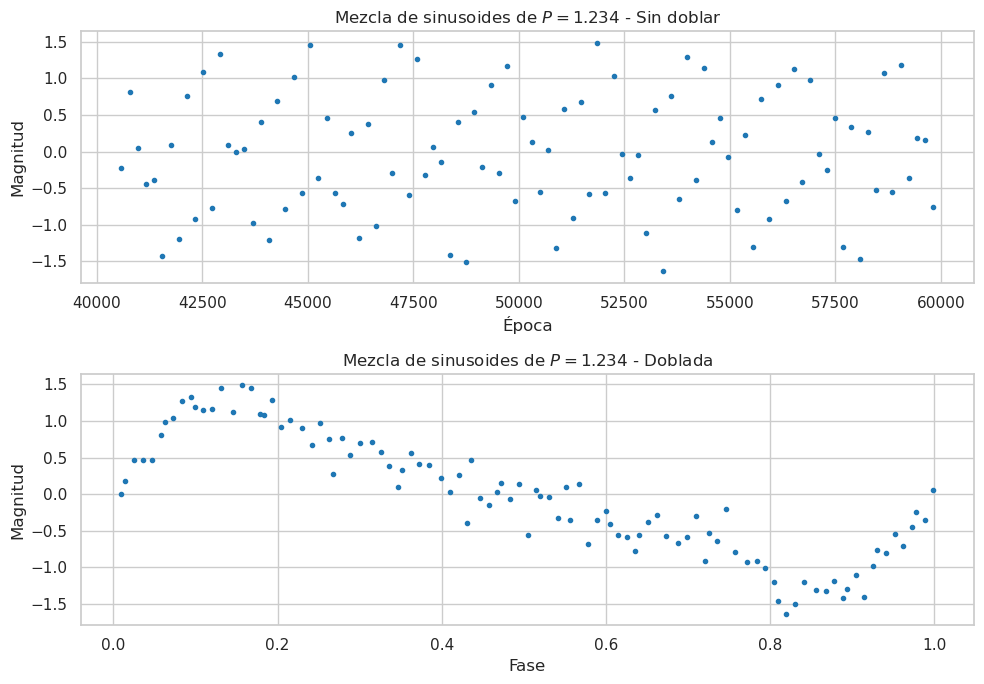

In [36]:
P = 1.234
mjd, mag = random_periodic_sin_mix(P, irregular=False)

fig, ax = plt.subplots(2, figsize=(10,7), tight_layout=True)
plot_periodic(mjd, mag, P, 'Mezcla de sinusoides de $P=1.234$', ax)

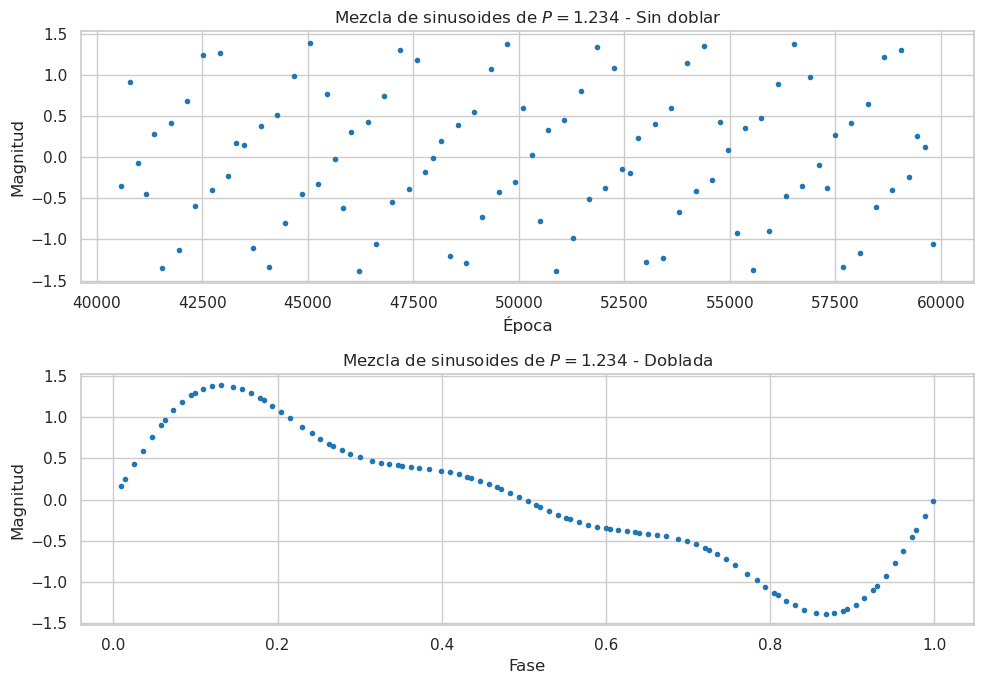

In [39]:
P = 1.234
mjd, mag = random_periodic_sin_mix(P, irregular=False, s_noise=0)

fig, ax = plt.subplots(2, figsize=(10,7), tight_layout=True)
plot_periodic(mjd, mag, P, 'Mezcla de sinusoides de $P=1.234$', ax)

In [40]:
def random_gauss_signal(mu=0, sigma=1, seq_len=100, s_noise=0.2, irregular=True):
    """Genera una curva aleatoria de diente de sierra.

    Parameters
    ----------
    seq_len : int
        Número int que define la cantidad de períodos a generar.
    s_noise : float
        float que fija la cantidad de ruido a agregar.

    Returns
    -------
    tuple
        tuple con los tiempos y magnitudes de la curva.            
    """    
    mjd = random_dates(N=seq_len, irregular=False)
    mjd = np.sort(mjd)
    mag = np.random.normal(loc=mu, scale=sigma, size=seq_len) 
    mag += np.random.randn(seq_len)*s_noise
    return mjd, mag    

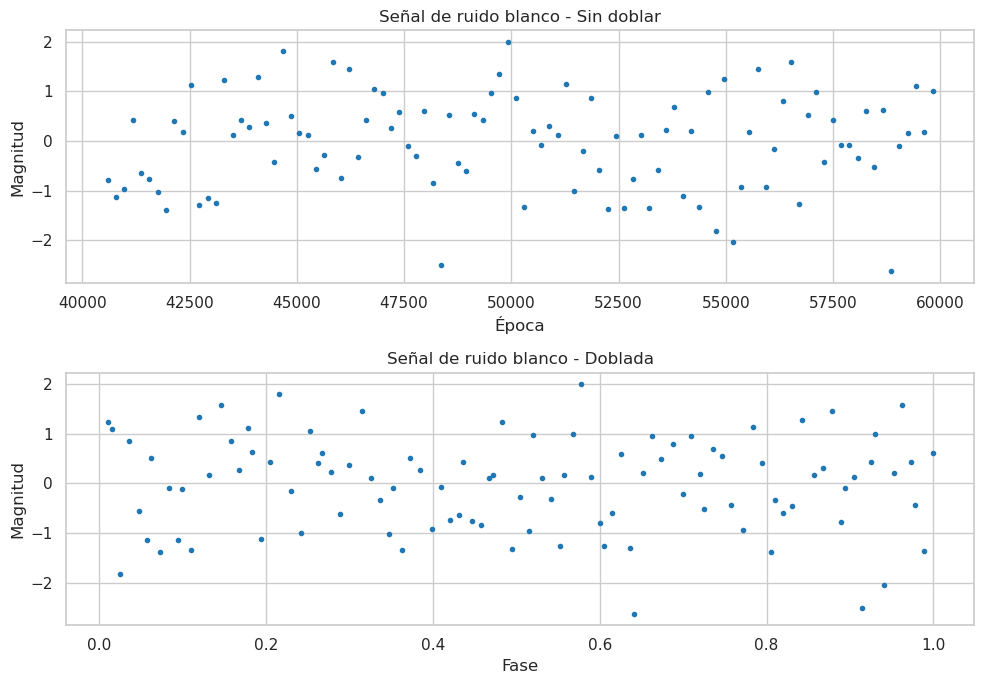

In [42]:
mjd, mag = random_gauss_signal()

fig, ax = plt.subplots(2, figsize=(10,7), tight_layout=True)
plot_periodic(mjd, mag, P, 'Señal de ruido blanco', ax)

## Adaptación a dataset de Pytorch

### Dataset class

In [12]:
class lc_dataset(Dataset):
    def __init__(self, seed=42):
        # Set seed
        self.seed = seed
        np.random.seed(self.seed)

        # Generators
        self.curve_generators = {'square': random_periodic_square_signal,
                                'sawtooth': random_periodic_sawtooth_signal,
                                'sinmix': random_periodic_sin_mix}

        # Curve data
        self.period_list = []
        self.mjd_list = []
        self.mag_list = []
        self.labels = []

    def generate_periods(self, N, min_period, max_period):
        """Genera una lista de períodos random.

        Parameters
        ----------
        N : int
            Número int que define la cantidad de períodos a generar.
        min_period : float
            float que define el mínimo valor posible a generar.
        max_period : float
            float que define el máximo valor posible a generar.

        Returns
        -------
        np.ndarray
            np.ndarray con el arreglo de períodos generados.            
        """
        random_period_list = []
        for idx in range(N):
            random_period = np.random.uniform(min_period, max_period)
            random_period_list.append(random_period)
        return random_period_list
        
    def add_curves(self, curve_type, N, seq_len, min_period, max_period, label):
        """Añade N curvas de un determinado tipo al dataset.

        Parameters
        ----------
        curve_type : str
            str que define el tipo de curvas a generar.
        N : int
            Número int que define la cantidad de períodos a generar.            
        min_period : float
            float que define el mínimo valor posible a generar.
        max_period : float
            float que define el máximo valor posible a generar.
        label : int
            int que define el label que tendrán las curvas generadas.            
        """
        period_list = self.generate_periods(N, min_period, max_period)
        self.period_list += period_list
        for period in period_list:
            mjd, mag = self.curve_generators[curve_type](period, seq_len=seq_len)
            self.mjd_list.append(mjd)
            self.mag_list.append(mag)
            self.labels.append(label)

    def to_df(self):
        """Transforma los datos generados en un Pandas DataFrame.

        Returns
        -------
        pd.DataFrame
            pd.DataFrame con los datos generados.            
        """        
        dataset_df = pd.DataFrame({'mjd':self.mjd_list,
                                    'mag':self.mag_list,
                                    'period':self.period_list,
                                    'label':self.labels})
        return dataset_df

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        curve_dict = {'mjd':torch.tensor(self.mjd_list[idx]),
                    'mag':torch.tensor(self.mag_list[idx]),
                    'period':torch.tensor(self.period_list[idx]),
                    'label':torch.tensor(self.labels[idx])}
        return curve_dict

### Prueba

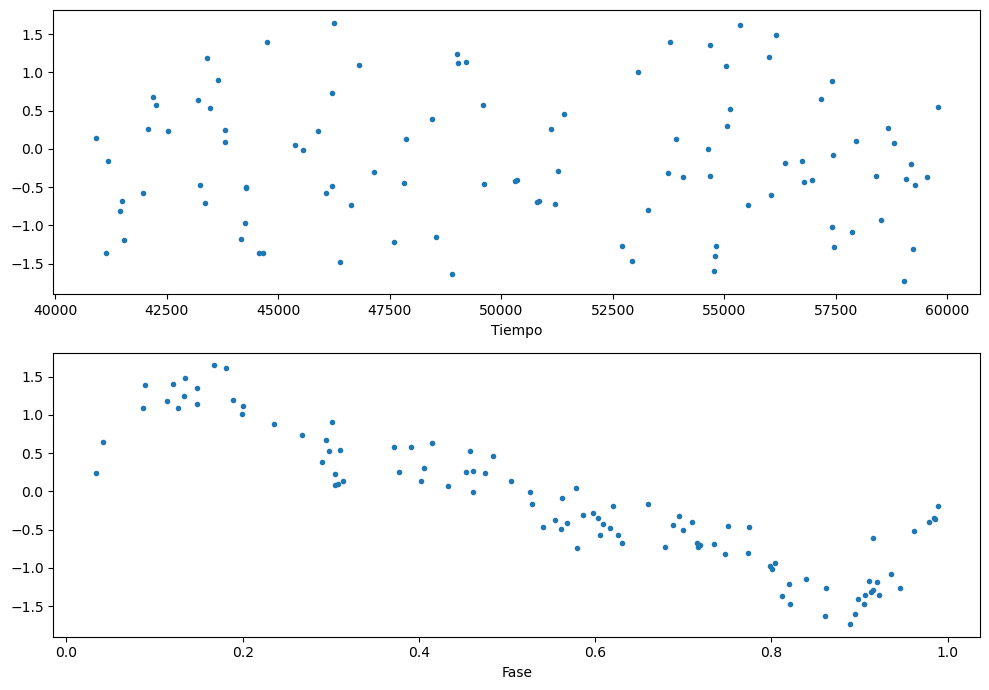

In [14]:
dataset = lc_dataset()
dataset.add_curves('sinmix', 100, 100, 0.2, 2, 0)

fig, ax = plt.subplots(2, figsize=(10,7), tight_layout=True)
obj_id = 40
plot_periodic(*dataset.to_df().loc[obj_id].values[:-1], ax)

In [15]:
dataset.add_curves('sawtooth', 100, 100,5, 10, 1)
dataset.to_df()

mjd  \
0    [40612.7876822335, 40720.11531026685, 40932.67...   
1    [41151.33667413885, 41191.343967297755, 41249....   
2    [40700.72850227826, 40879.7873101258, 41193.47...   
3    [40753.45204734205, 40839.541297799566, 41217....   
4    [40832.64389285898, 40946.7462570432, 41362.27...   
..                                                 ...   
195  [40620.09857522439, 40704.95081093557, 40721.3...   
196  [40667.68046754504, 41429.85830903687, 41726.0...   
197  [40680.1333994992, 40776.254094875214, 40859.3...   
198  [40642.50611262407, 40741.70888311464, 40806.9...   
199  [40746.19953616429, 40953.46991268333, 41116.3...   

                                                   mag    period  label  
0    [-0.20068288220832498, 0.043835752023271946, 0...  0.874172      0  
1    [-0.5047309374426222, -0.39351590789948315, 1....  1.911286      0  
2    [0.3243465512224265, 0.29602902221245353, 0.47...  1.517589      0  
3    [-1.4713297393015443, 1.1070672134434352, 0.87...  1.277585      0  
4    [-0.20707202738599503, -1.349845772268231, 0.3...  0.480834      0  
..                                                 ...       ...    ...  
195  [0.19810192622044304, -0.7492554407634052, -0....  7.371238      1  
196  [-0.2829443060065291, 0.7719035098706017, 0.60...  9.855546      1  
197  [0.3375619011973389, -0.5156949172485872, 1.16...  7.058111      1  
198  [1.1096885959133131, -0.710243556626117, 0.741...  6.090640      1  
199  [0.28442973763896123, -0.263386625783913, 0.58...  7.569609      1  

[200 rows x 4 columns]